Features: nan
0.79 [0.79365079 0.78378378] [0.86206897 0.69047619] [0.82644628 0.73417722] [58 42]
0.86 [0.85483871 0.86842105] [0.9137931  0.78571429] [0.88333333 0.825     ] [58 42]
0.87 [0.84615385 0.91428571] [0.94827586 0.76190476] [0.89430894 0.83116883] [58 42]


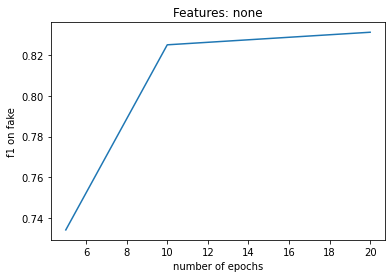

Features: percentage_punctuation
0.78 [0.82142857 0.72727273] [0.79310345 0.76190476] [0.80701754 0.74418605] [58 42]
0.87 [0.85714286 0.89189189] [0.93103448 0.78571429] [0.89256198 0.83544304] [58 42]
0.87 [0.84615385 0.91428571] [0.94827586 0.76190476] [0.89430894 0.83116883] [58 42]


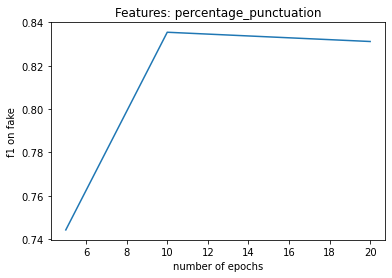

Features: percentage_uppercase
0.84 [0.83870968 0.84210526] [0.89655172 0.76190476] [0.86666667 0.8       ] [58 42]
0.85 [0.83076923 0.88571429] [0.93103448 0.73809524] [0.87804878 0.80519481] [58 42]
0.88 [0.859375   0.91666667] [0.94827586 0.78571429] [0.90163934 0.84615385] [58 42]


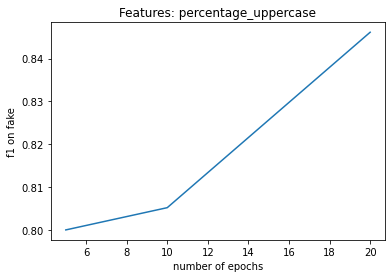

Features: percentage_punctuation,percentage_uppercase
0.73 [0.81632653 0.64705882] [0.68965517 0.78571429] [0.74766355 0.70967742] [58 42]
0.87 [0.86885246 0.87179487] [0.9137931  0.80952381] [0.8907563  0.83950617] [58 42]
0.88 [0.859375   0.91666667] [0.94827586 0.78571429] [0.90163934 0.84615385] [58 42]


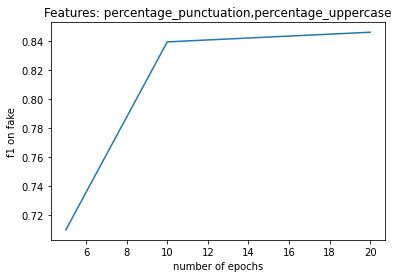

In [1]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sn
from matplotlib import pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

RESULTS_PATH = './results/'

tests = pd.read_csv(RESULTS_PATH + 'tests.csv')
tests = tests[tests['optimizer'] != 'sgd']
# for test in tests.iterrows():
#     parameters = {
#         'features': test['features'],
#         'optimizer'
#     }
#     filename = test['filename']

for feature in tests['features'].unique():
    print("Features:", feature)
    feature_tests = tests[tests['features'] == feature] if feature is not np.nan else tests[tests['features'].isnull()]
    
    results = []
    
    for test in feature_tests.iterrows():
        filename = test[1]['filename'].split(RESULTS_PATH)[1]
        filepath = RESULTS_PATH + filename
        
        df = pd.read_csv(filepath)
        y_true = df['true']
        y_pred = df['pred']
        
        a = accuracy_score(y_true, y_pred)
        p, r, f1, s = precision_recall_fscore_support(y_true, y_pred)
        
        results.append({
            'epochs': test[1]['epochs'],
            'accuracy': a,
            'f1_fake': f1[1]
        })
        print(a, p, r, f1, s)
    
    f, ax = plt.subplots()
    df = pd.DataFrame(results)
    plt.plot(df['epochs'], df['f1_fake'])
    ax.set_title('Features: ' + (str(feature) if feature is not np.nan else 'none'))
    ax.set_xlabel('number of epochs')
    ax.set_ylabel('f1 on fake')
    f.savefig('f1_fake_by_epochs_'+str(feature)+'.svg', bbox_inches='tight')
    plt.show()
#         cm = confusion_matrix(y_true, y_pred)
#         sn.heatmap(cm, annot=True)
#         plt.show()
        